# Problem 1 : Analysis of Numeric Variables
Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame.


In [3]:
import pandas as pd
houseData = pd.read_csv('Downloads/CZ1115-Python-main/CZ1115-Python-main/Week 04/train.csv', header = 'infer')


houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


a) Check the individual statistical description and visualize the statistical distributions of each of these variables.


In [14]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


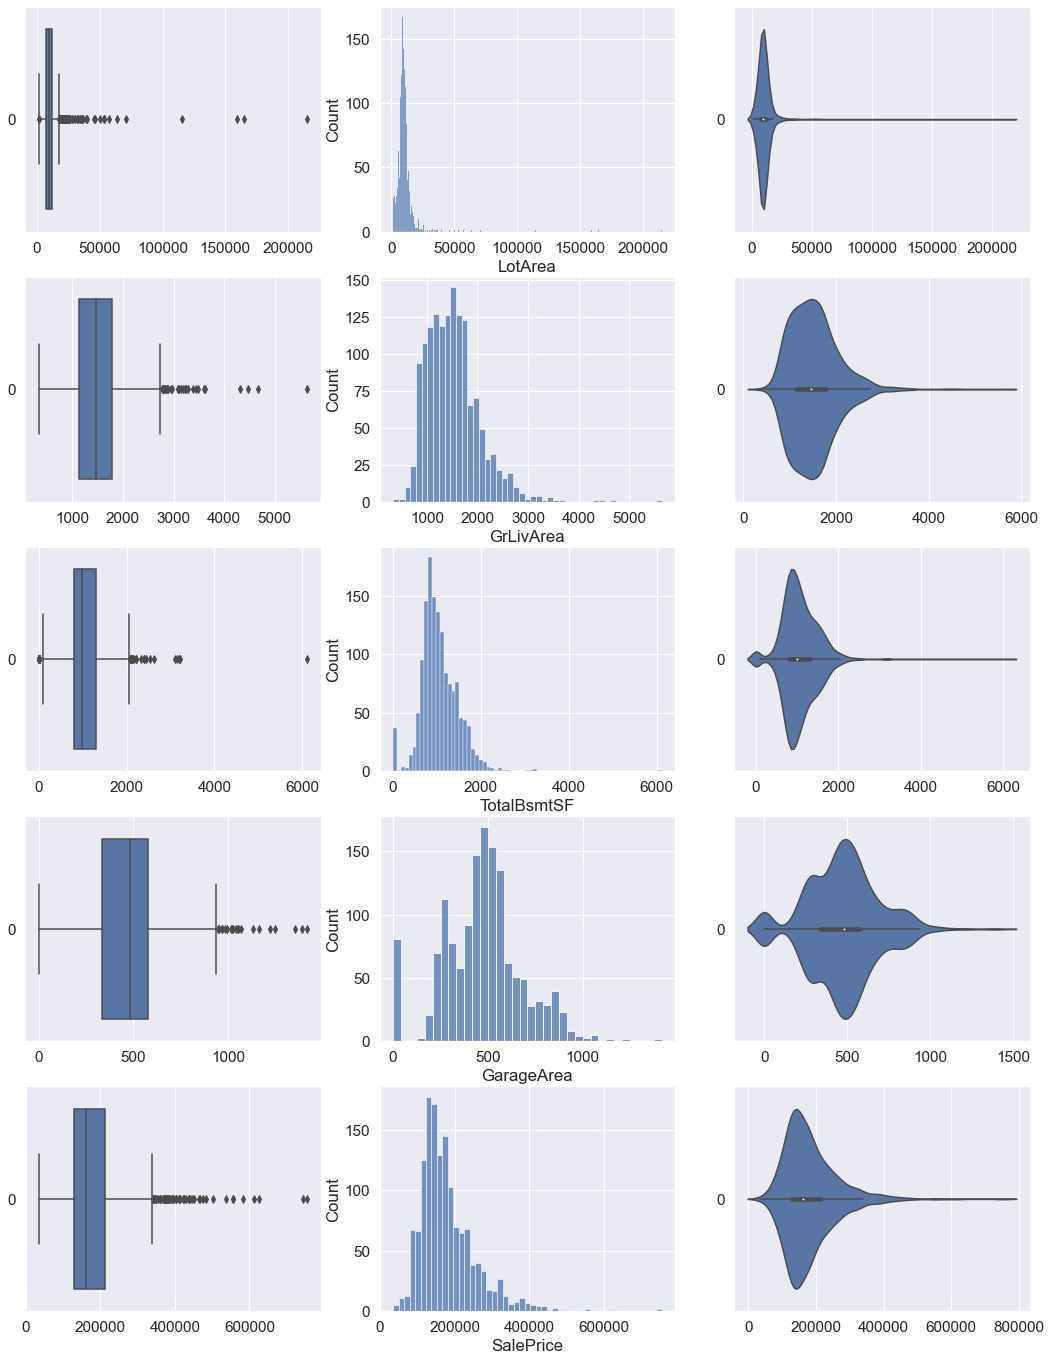

In [41]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(font_scale = 1.4)

f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

b) Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the
“skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?


In [16]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [24]:
Q1 = houseNumData.quantile(0.25)
Q3 = houseNumData.quantile(0.75)
IQR = Q3-Q1
((houseNumData < (Q1 - 1.5 * IQR)) | (houseNumData > (Q3 + 1.5 * IQR))).sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

GarageArea > GrLivArea > TotalBsmtSF > SalePrice > LotArea for normality of distribution.

LotArea has most outliers.

c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”?


<AxesSubplot:>

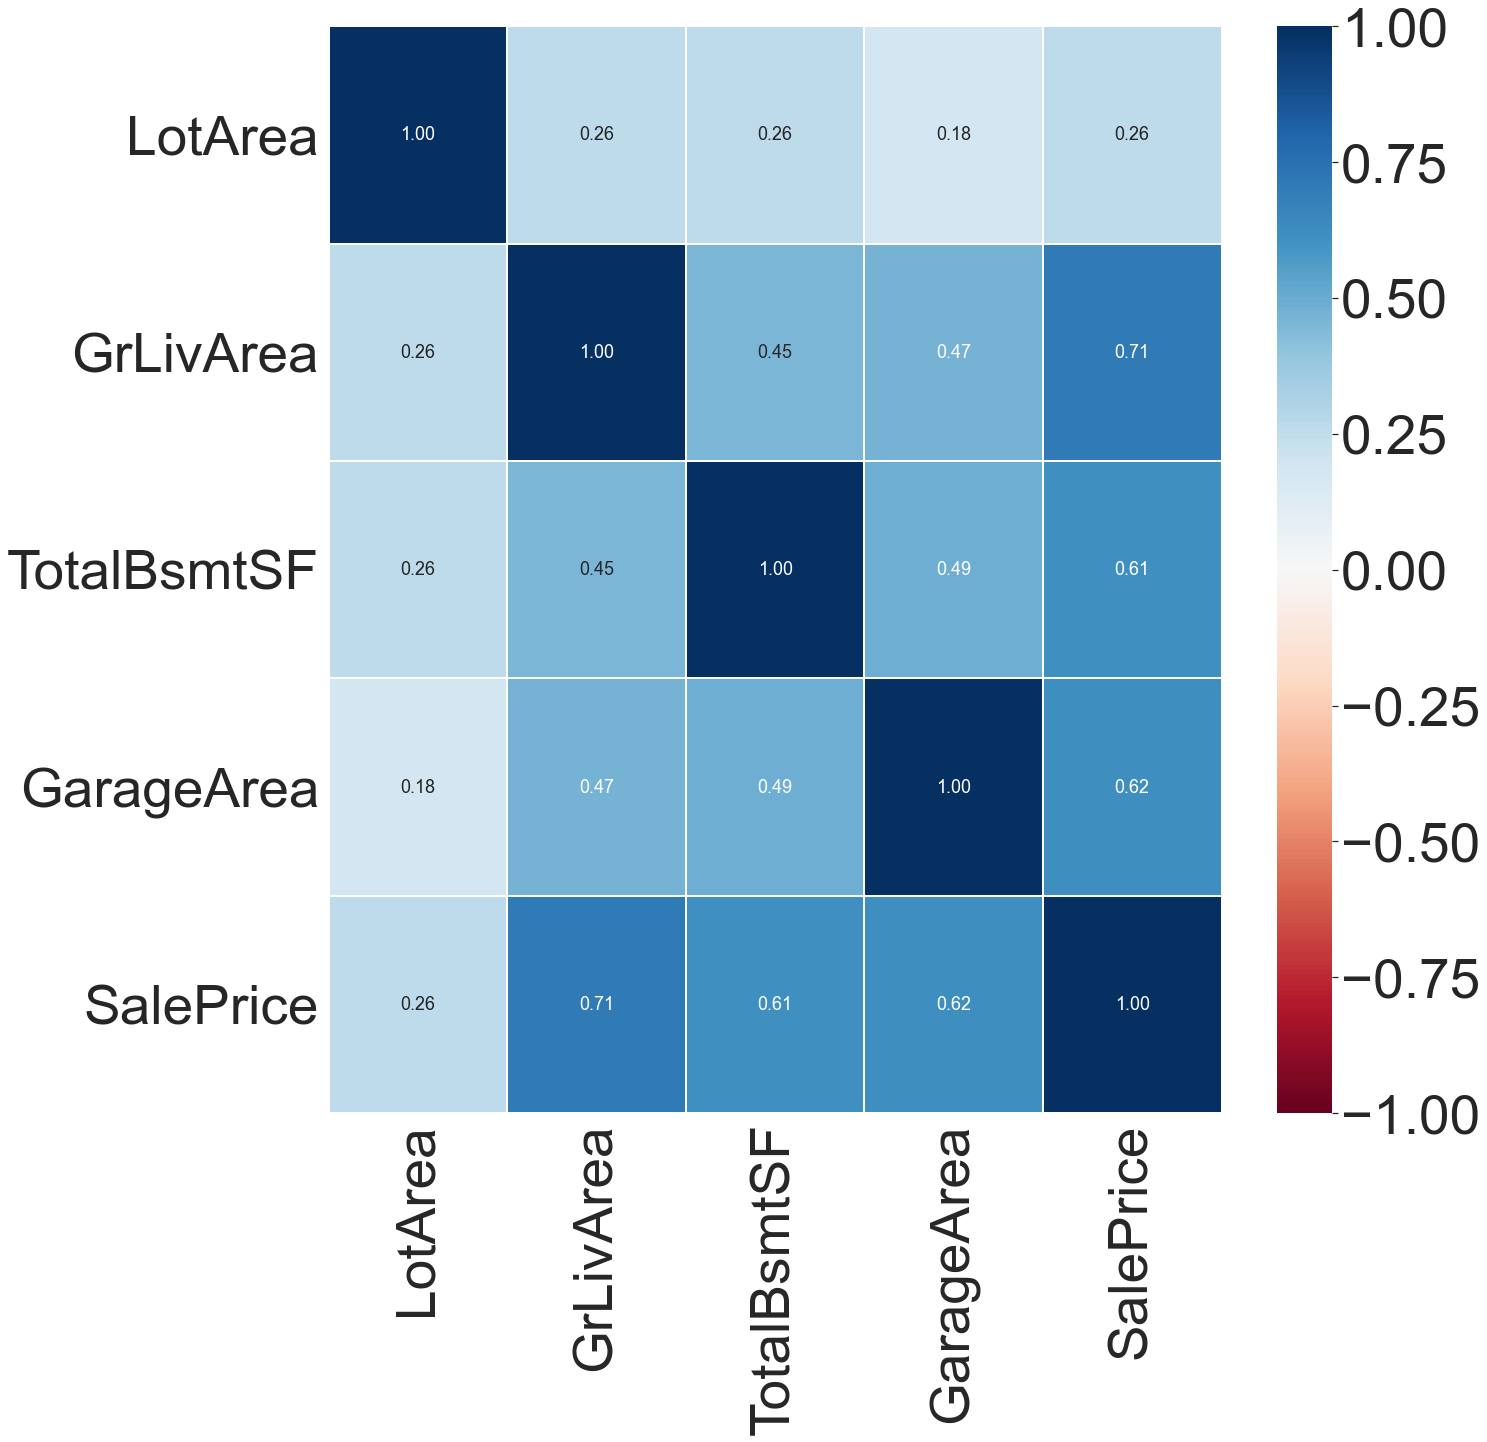

In [36]:
f = plt.figure(figsize=(20, 20))
sb.set(font_scale=5)
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")


GrLivArea. Above grade (ground) living area square feet. Yes.

d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?

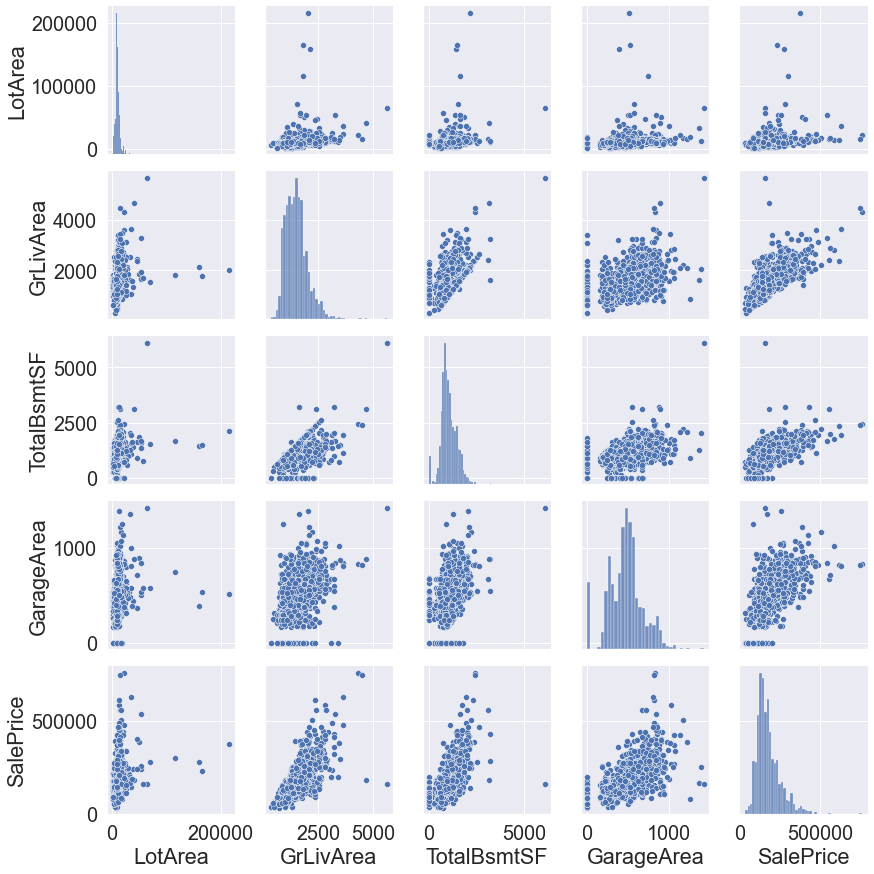

In [40]:
sb.set(font_scale=1.8)
sb.pairplot(data = houseNumData)

GrLivArea. Above grade (ground) living area square feet. Highest correlation, strong linearity

# Problem 2 : Analysis of Categorical Variables
Extract the following Categorical variables from the dataset, and store as a new Pandas DataFrame.
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])


In [43]:
import pandas as pd
houseData = pd.read_csv('Downloads/CZ1115-Python-main/CZ1115-Python-main/Week 04/train.csv', header = 'infer')

houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head(20)

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
5,50,Mitchel,1Fam,5
6,20,Somerst,1Fam,8
7,60,NWAmes,1Fam,7
8,50,OldTown,1Fam,7
9,190,BrkSide,2fmCon,5


a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).


In [80]:
houseCatData = houseCatData.astype('category')
houseCatData.dtypes

MSSubClass      category
Neighborhood    category
BldgType        category
OverallQual     category
dtype: object

b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.


In [54]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


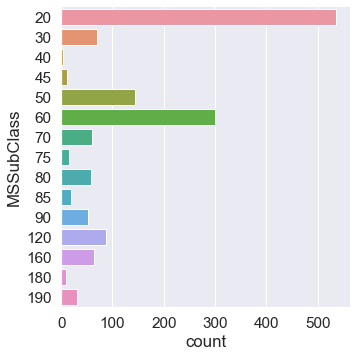

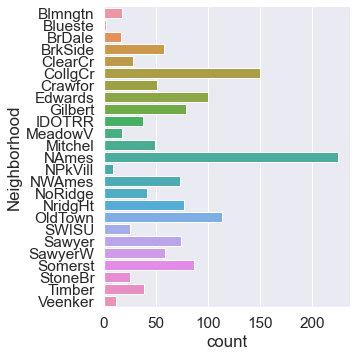

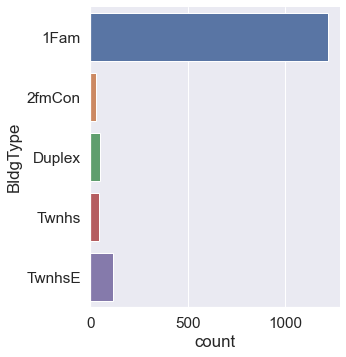

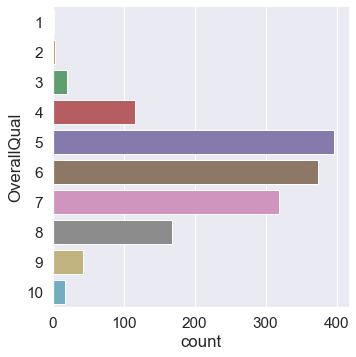

In [59]:
import seaborn as sb

for var in houseCatData:
    sb.catplot(y = var, data = houseCatData, kind = "count")

c) One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts.
Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables.
Comment if this is useful in identifying the relation between “OverallQual” with the other variables.


<AxesSubplot:xlabel='BldgType', ylabel='OverallQual'>

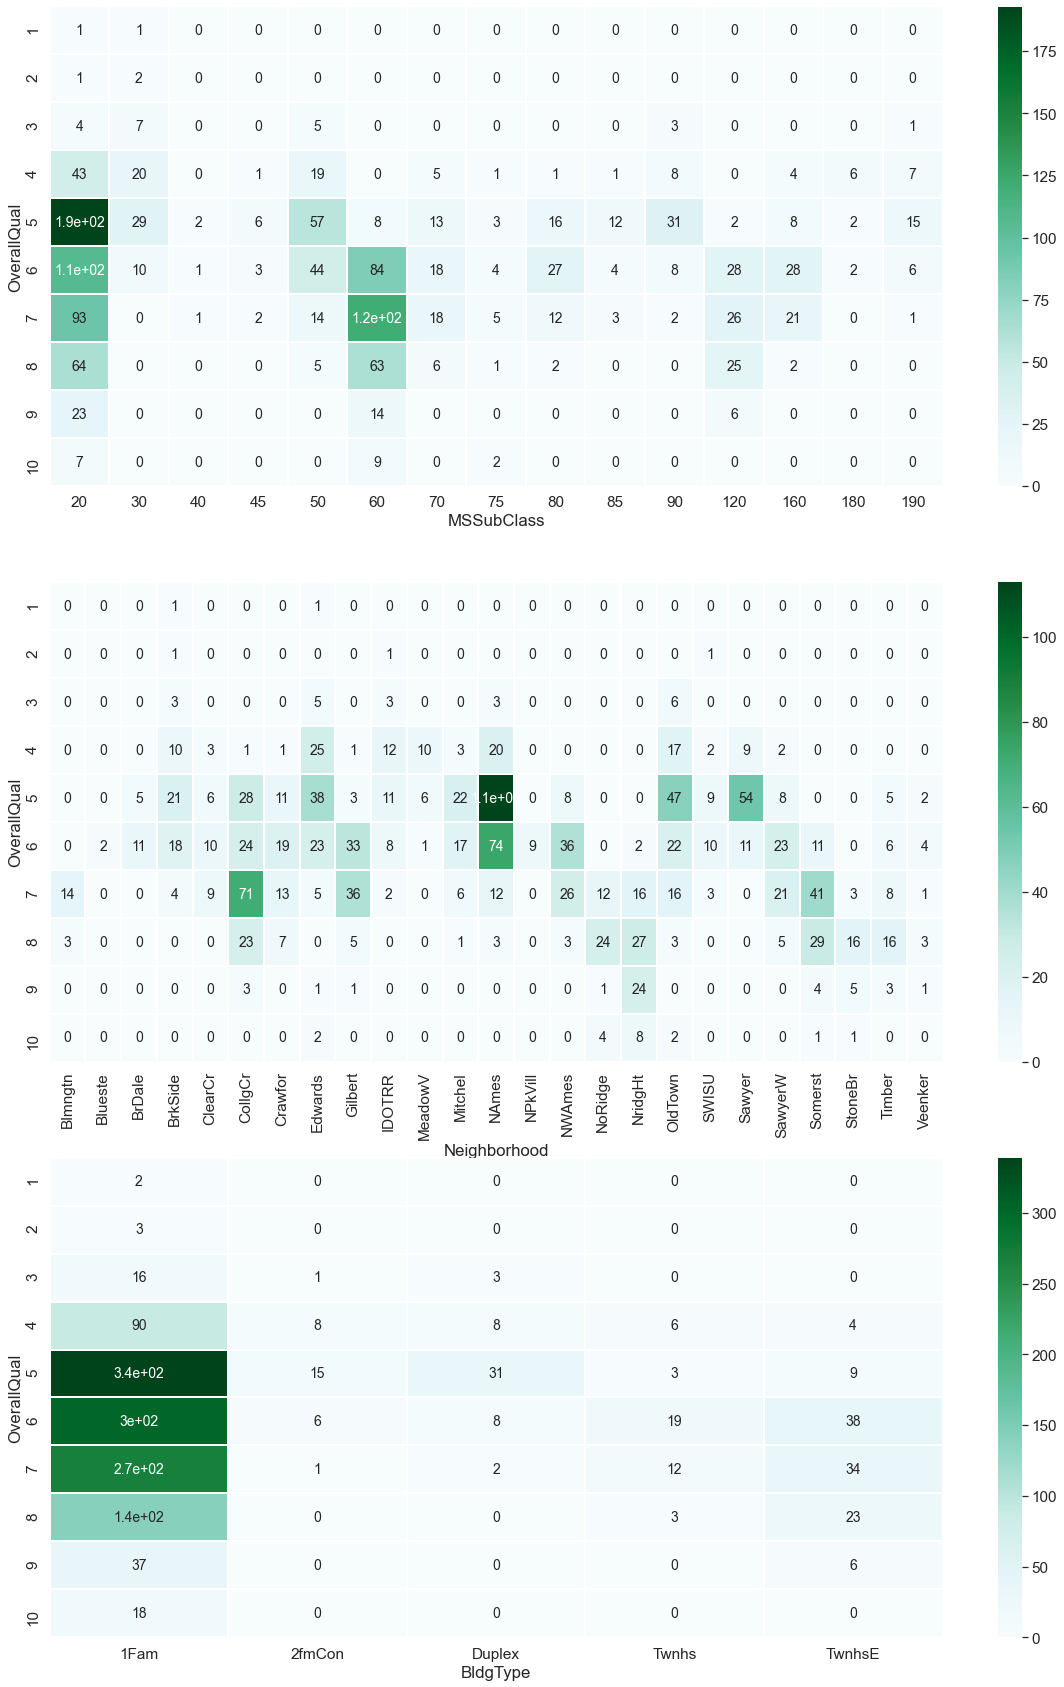

In [69]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(3, 1, figsize=(20, 30))

sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0])
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1])
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[2])

???????????????????????????????????????????

d) Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots.
Comment on which of these variables has the most influence in predicting “SalePrice”.

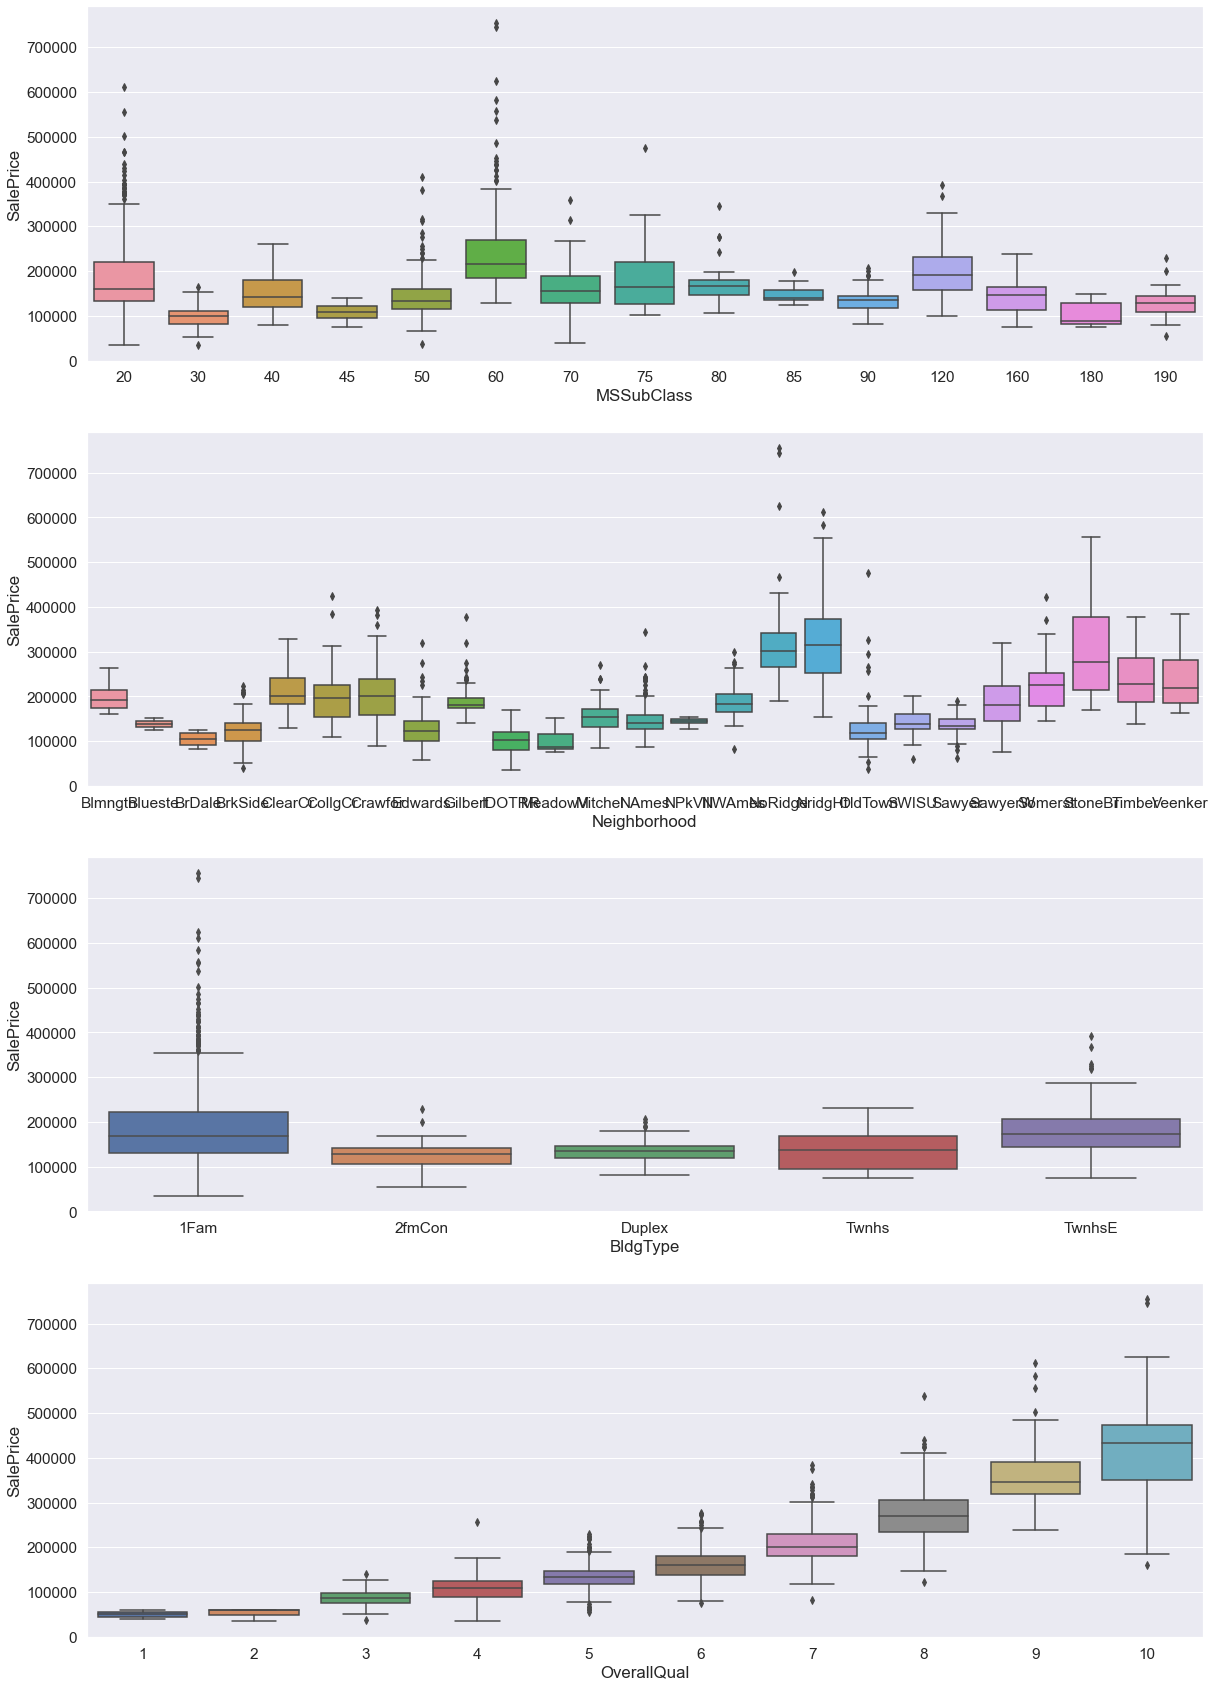

In [79]:
f, axes = plt.subplots(4, 1, figsize=(20, 30))
lol = 0

for var in houseCatData:
    sb.boxplot(y = houseData['SalePrice'], x = houseCatData[var], ax = axes[lol])
    lol +=1

OverallQual